# ONION Disease Prediction

## Importing libraries

In [49]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

### Training Image preprocessing

In [50]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 50 files belonging to 5 classes.


### Validation Image Preprocessing

In [51]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 47 files belonging to 5 classes.


## Building Model

In [52]:
cnn = tf.keras.models.Sequential()

### Building Convolution Layer

In [53]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [54]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [55]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [56]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [57]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [58]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [59]:
cnn.add(tf.keras.layers.Flatten())

In [60]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [61]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [62]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=5,activation='softmax'))

### Compiling and Training Phase

In [63]:
# cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
#     learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [64]:
cnn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │         7,505 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,793,229 (29.73 MB)

 Trainable params: 7,793,229 (29.73 MB)

 Non-trainable params: 0 (0.00 B)

In [65]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=30)

Epoch 1/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 991ms/step - accuracy: 0.1587 - loss: 2.0579 - val_accuracy: 0.2340 - val_loss: 1.9744
Epoch 2/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 791ms/step - accuracy: 0.2300 - loss: 1.8741 - val_accuracy: 0.2553 - val_loss: 1.5782
Epoch 3/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 800ms/step - accuracy: 0.2404 - loss: 1.7437 - val_accuracy: 0.2340 - val_loss: 1.5387
Epoch 4/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 952ms/step - accuracy: 0.2433 - loss: 1.6150 - val_accuracy: 0.4043 - val_loss: 1.4837
Epoch 5/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 948ms/step - accuracy: 0.3013 - loss: 1.6345 - val_accuracy: 0.3191 - val_loss: 1.4833
Epoch 6/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 920ms/step - accuracy: 0.3650 - loss: 1.5146 - val_accuracy: 0.2766 - val_loss: 1.4921
Epoch 7/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 843ms/step - accuracy: 0.2329 - loss: 1.5241 - val_accuracy: 0.5532 - val_loss: 1.4517
Epoch 8/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 909ms/step - accuracy: 0.3992 - loss: 1.4589 - val_accuracy: 0.7234 - val_loss:

## Evaluating Model

In [66]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 170ms/step - accuracy: 1.0000 - loss: 0.0677
Training accuracy: 1.0


In [67]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 148ms/step - accuracy: 0.9754 - loss: 0.1212
Validation accuracy: 0.978723406791687


### Saving Model

In [68]:
cnn.save('trained_plant_disease_model.keras')

In [69]:
training_history.history #Return Dictionary of history

{'accuracy': [0.1599999964237213,
  0.2199999988079071,
  0.2199999988079071,
  0.23999999463558197,
  0.2800000011920929,
  0.36000001430511475,
  0.23999999463558197,
  0.3799999952316284,
  0.3799999952316284,
  0.5600000023841858,
  0.36000001430511475,
  0.4399999976158142,
  0.4399999976158142,
  0.6399999856948853,
  0.6399999856948853,
  0.6800000071525574,
  0.800000011920929,
  0.6800000071525574,
  0.7599999904632568,
  0.7200000286102295,
  0.800000011920929,
  0.7799999713897705,
  0.8600000143051147,
  0.800000011920929,
  0.8999999761581421,
  0.8799999952316284,
  0.9399999976158142,
  0.8399999737739563,
  0.9800000190734863,
  0.9599999785423279],
 'loss': [2.0435221195220947,
  1.81453275680542,
  1.8046976327896118,
  1.6596449613571167,
  1.652127981185913,
  1.5384416580200195,
  1.5249677896499634,
  1.4699578285217285,
  1.506319522857666,
  1.4014592170715332,
  1.4701555967330933,
  1.3781979084014893,
  1.3287897109985352,
  1.2287254333496094,
  1.1484621763

In [70]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [71]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


## Accuracy Visualization

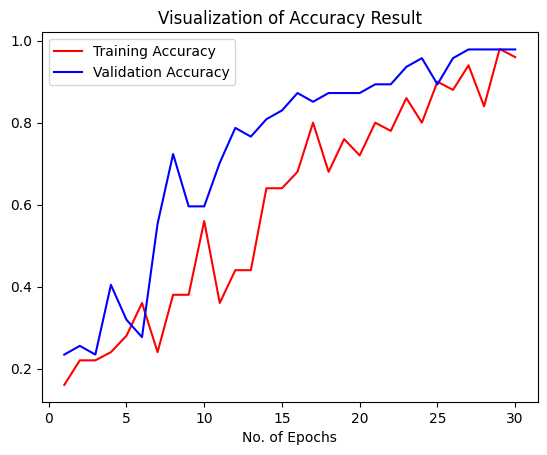

In [72]:
epochs = [i for i in range(1,31)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [73]:
class_name = validation_set.class_names

In [74]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 47 files belonging to 5 classes.


In [75]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step


In [76]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [77]:
Y_true

<tf.Tensor: shape=(47,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4], dtype=int64)>

In [78]:
predicted_categories

<tf.Tensor: shape=(47,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 0, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4], dtype=int64)>

In [79]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [80]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

               precision    recall  f1-score   support

bacterialsoft       0.90      1.00      0.95         9
   blackmould       1.00      1.00      1.00        10
      neckrot       1.00      1.00      1.00        11
  onionsmudge       1.00      0.86      0.92         7
    whiteroot       1.00      1.00      1.00        10

     accuracy                           0.98        47
    macro avg       0.98      0.97      0.97        47
 weighted avg       0.98      0.98      0.98        47



### Confusion Matrix Visualization

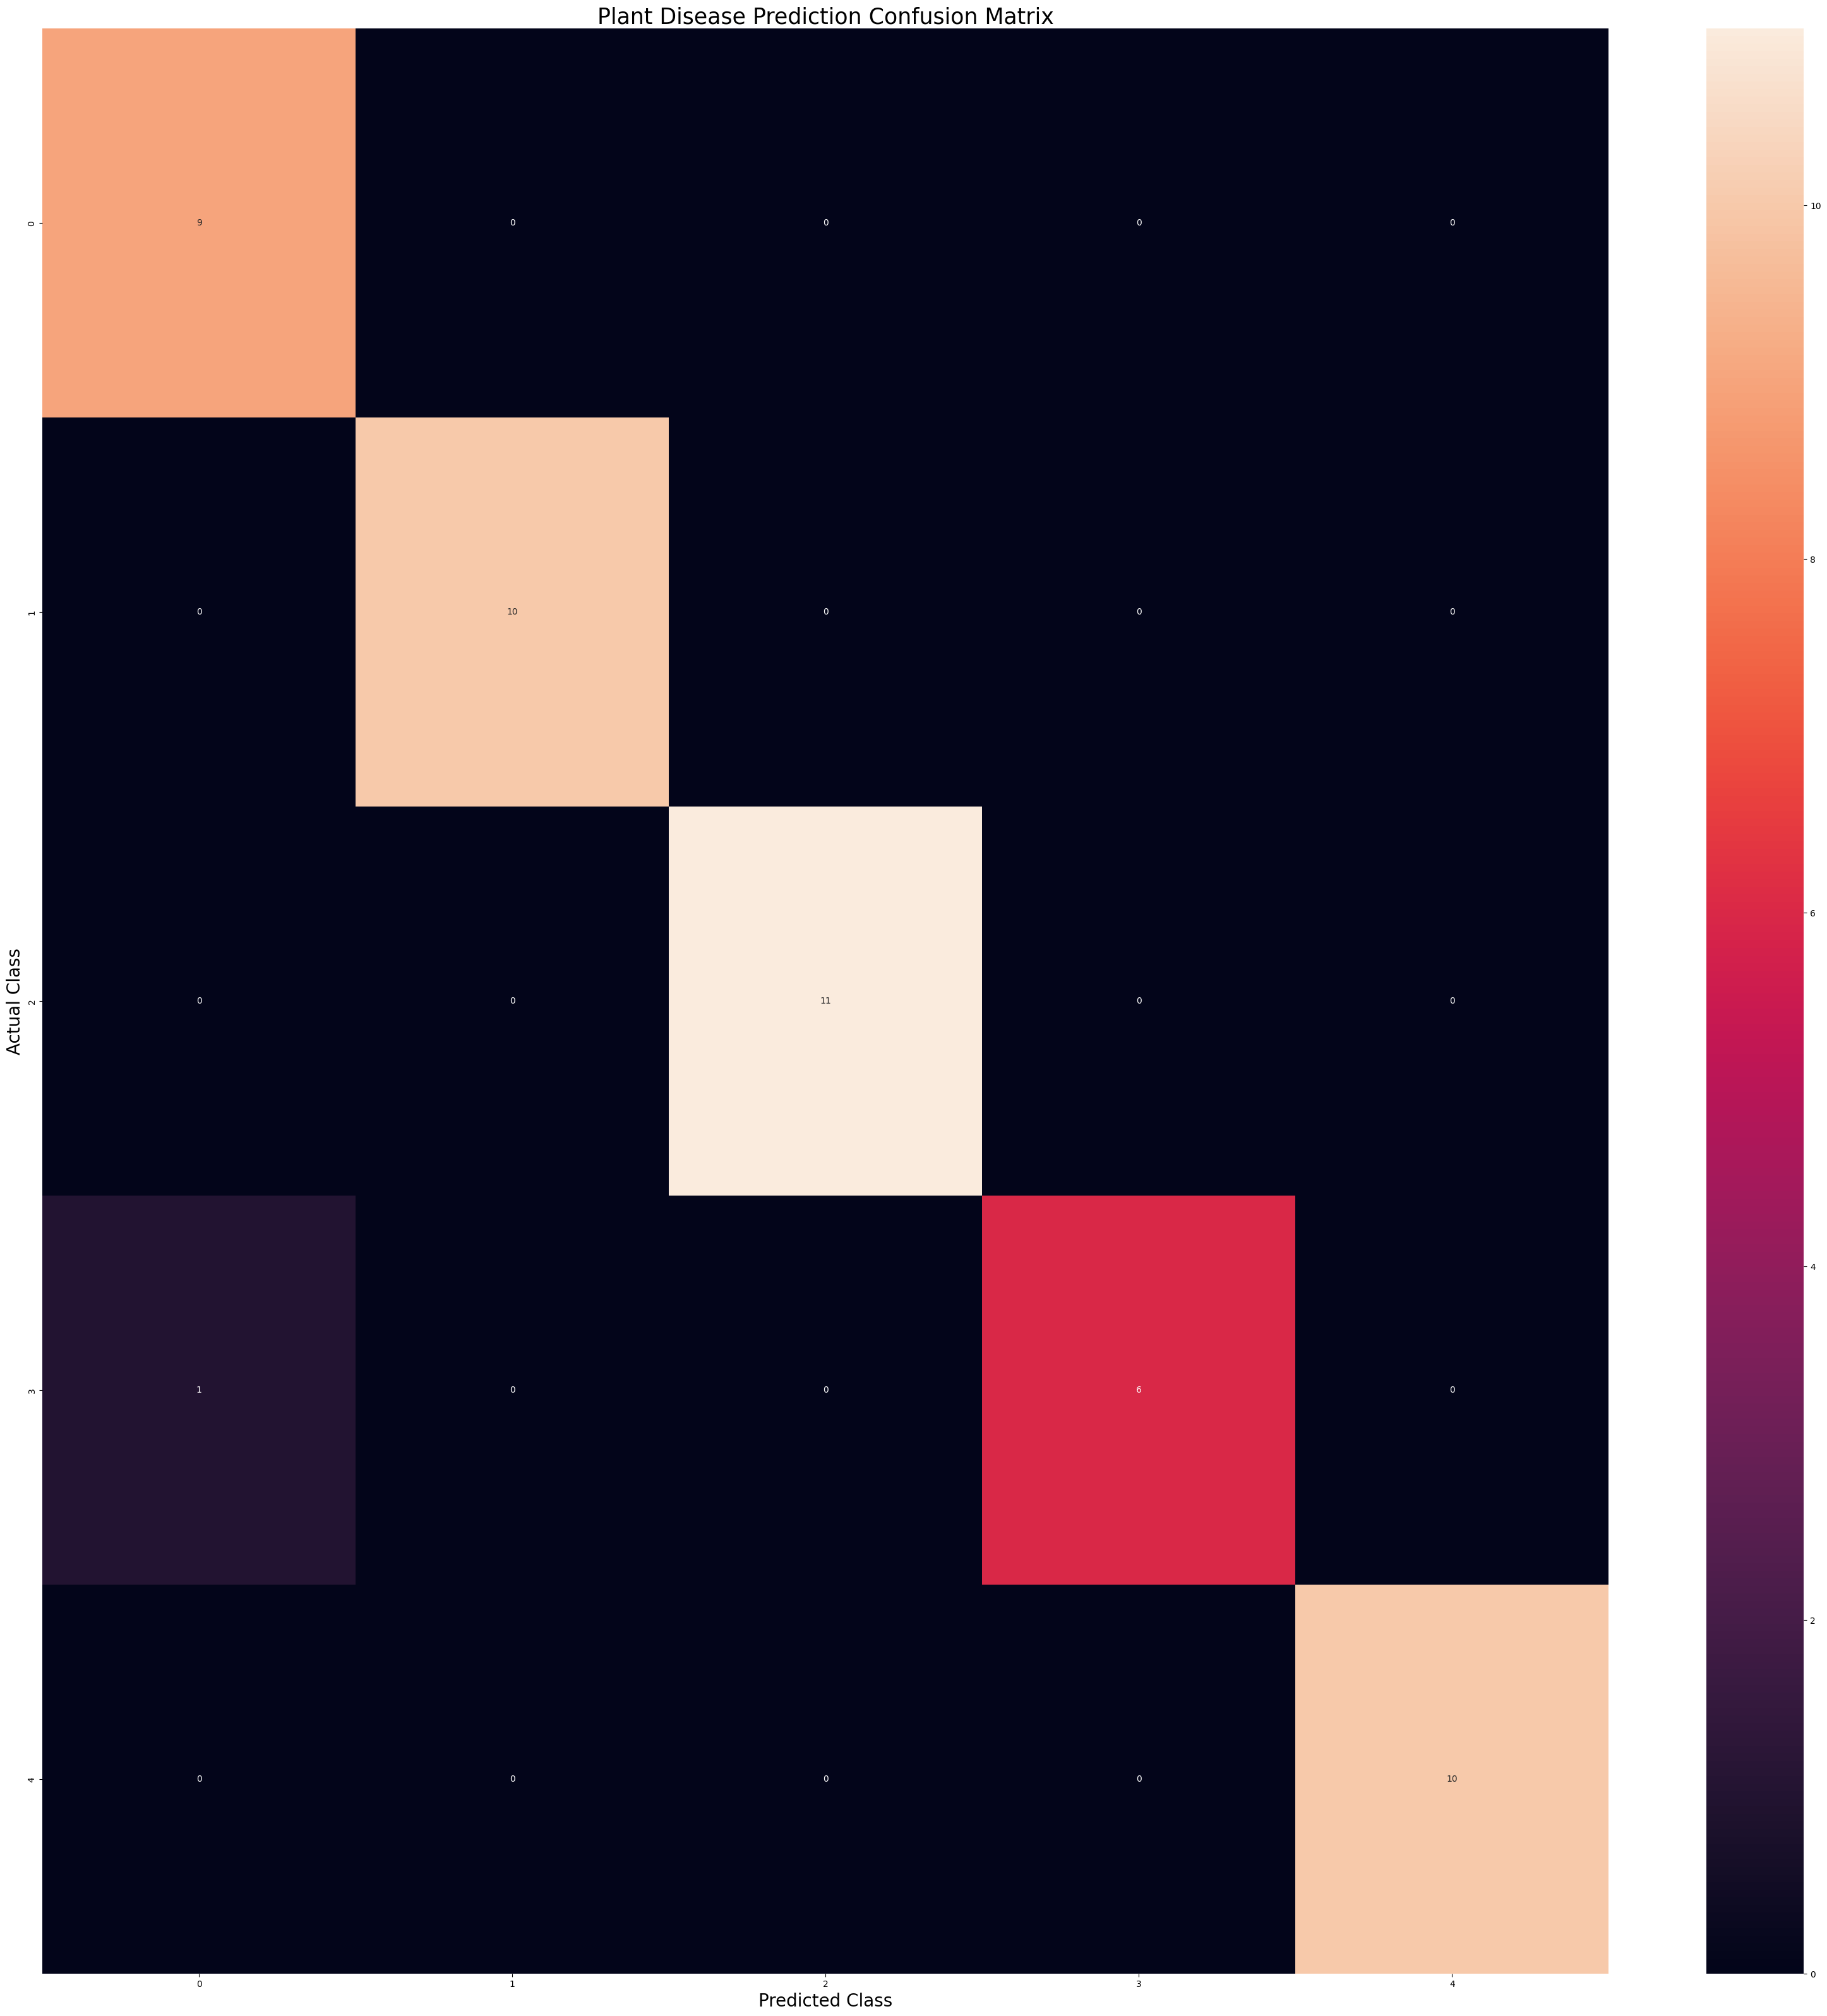

In [81]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()